### Machine Learning

``what is machine learning ? ``

Task T

Performance P

Experience E

For a Task T, Performace P should impore with more Experience E

`Study of Computer Alogrithms` that can help us to `predict hidden patterns` from data without writing explicit program is known as `Machine Learning`

In [1]:
from tqdm import tqdm
from time import sleep

for _ in tqdm(range(300)):
    sleep(1)

100%|███████████████████████████████████████████████████████████████████████| 300/300 [05:00<00:00,  1.00s/it]


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('tableau-colorblind10')

In [5]:
#plt.style.available

In [6]:
h1b = pd.read_csv('../datascience/data/h1b.csv', index_col=0)

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
h1b.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [8]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [12]:
h1b['YEAR'] = h1b['YEAR'].apply(lambda v: str(v).split('.')[0] if str(v) != 'nan' else v)

In [13]:
h1b['YEAR'].unique()

array(['2016', '2015', '2014', '2013', '2012', '2011', nan], dtype=object)

In [14]:
h1b.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [16]:
pet = h1b.groupby('YEAR')['CASE_STATUS'].value_counts()

In [28]:
year = [ '2011', '2012', '2013', '2014', '2015', '2016']

In [29]:
certified = {}
for y in year:
    certified[y] = pet[y, 'CERTIFIED']

In [35]:
d = pd.Series(certified)

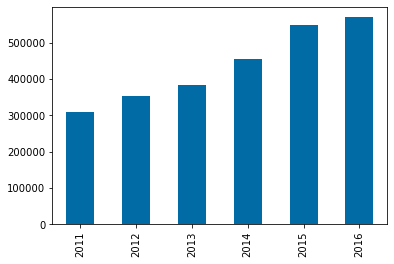

In [38]:
d.plot(kind='bar')
plt.show()

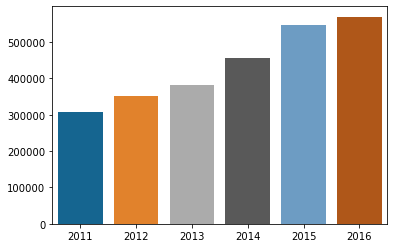

In [40]:
sns.barplot(d.index, d.values,)
plt.show()

### Regression

`predicting` the value of `dependent variable` on the basis of `independent variable` known as `regression`

In [41]:
height = np.random.normal(140, 20, 1000)

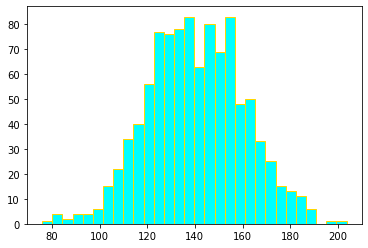

In [42]:
plt.hist(height, ec='gold', color='cyan', bins=30)
plt.show()

In [43]:
weight = np.random.normal(80, 20, 1000)

In [44]:
print(np.corrcoef(height, weight))

[[1.         0.02113403]
 [0.02113403 1.        ]]


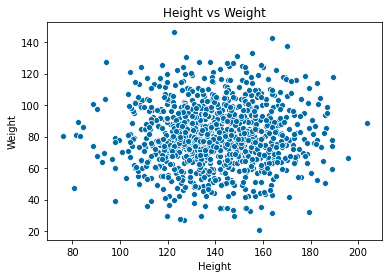

In [46]:
plt.title("Height vs Weight")
sns.scatterplot(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [59]:
height = np.random.normal(140, 20, 100)

In [60]:
weight = 0.5 * height + np.random.normal(30, 5, 100)

`beta_0 = 30`

`beta_1 = 0.5`

`Regression Analysis`

In [61]:
np.corrcoef(height, weight)

array([[1.        , 0.90524788],
       [0.90524788, 1.        ]])

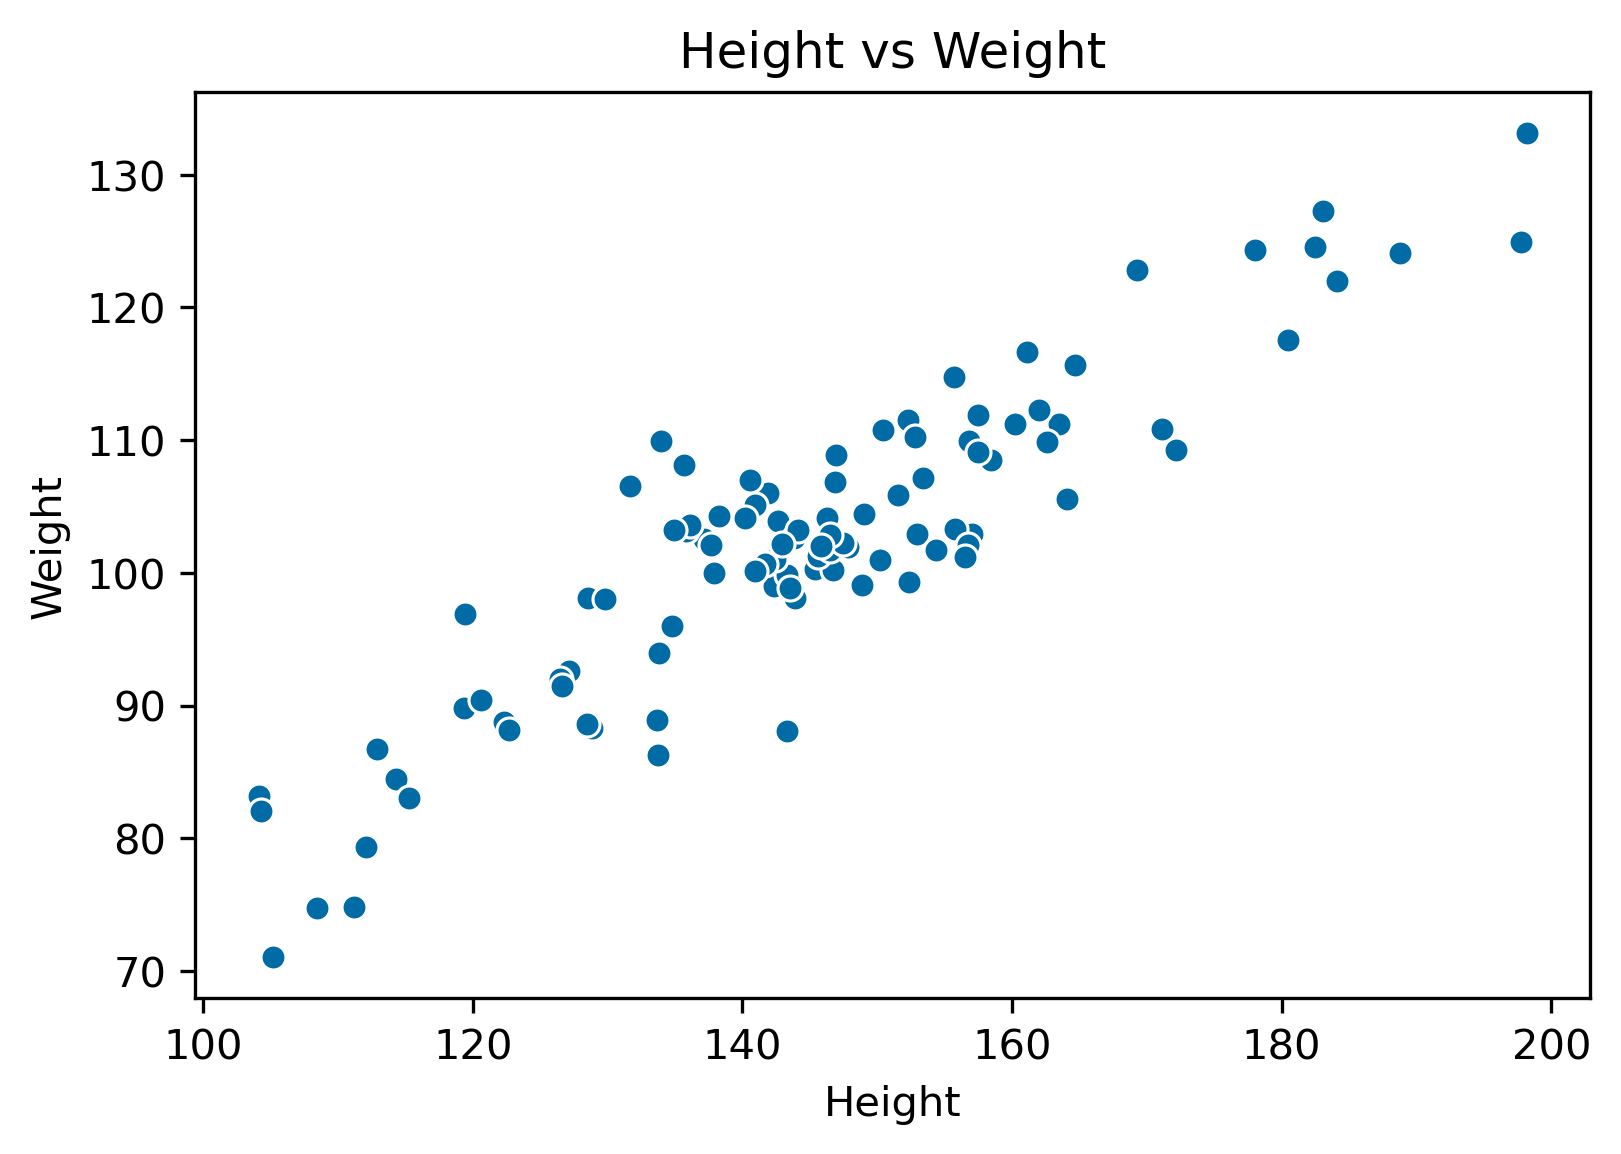

In [62]:
plt.figure(dpi=300)
plt.title("Height vs Weight")
sns.scatterplot(height, weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

$$ \hat y \quad = \quad h(X) \quad = \quad \beta_0 + \beta_1 X $$



here x is height, y is weight, $\hat y$ is predicted weight, h(X) is hypothesis to find relation between height and weights, $\beta_1$ and $\beta_0$ are parameters known as $\beta_1$ is coeffiecient / slope, $\beta_0$ is intercept

#### to estimate value of $\beta_0$ and $\beta_1$ we have minimize the cost function

__in regression we Mean Squared Error as our cost function also known as L-2 Norm Loss__

$$ MSE = \frac { \sum\limits_{i=1}^N {(y_i - \hat y_i)}^2 } {N}  $$

let's replace $\hat y$ with hypothetical value

$$ MSE \quad = \quad \frac { \sum\limits_{i=1}^N \quad {(y_i - {(\beta_0+\beta_1 x_i)})}^2 } {N}  $$

let's differentiate wrt $\beta_0$ and $\beta_1$ to minimize our cost

$$\beta_1 \quad = \quad \frac {\sum\limits_{i=1}^N \quad (x_i-\bar x)\quad(y_i-\bar y) } { \sum\limits_{i=1}^N \quad {(x_i-\bar x)}^2 } $$

$$\beta_0 \quad = \quad \bar y - \beta_1 \bar x$$

In [63]:
x = height
y = weight 

In [64]:
xbar = x.mean()
ybar = y.mean()

In [65]:
beta_1 = ( ( x - xbar ) * ( y - ybar ) ).sum() / ( ( x - xbar )**2 ).sum()

In [66]:
beta_0 = ybar - (beta_1 * xbar)

In [67]:
beta_1 # 0.5

0.5353241226448908

In [68]:
beta_0 # 30

24.641287240939945

In [69]:
# 25 + 0.5 * array([100, 200, 50])
# 25 + array([ 50, 100, 25])
# [ 75, 125, 50]
y_pred = beta_0 + (beta_1*x)

In [70]:
y_pred[:5]

array([106.52474947, 105.16201978, 102.47910945,  80.37750386,
        98.65669278])

In [71]:
y[:5]

array([102.9233314 , 110.73058968, 100.30570607,  83.21719795,
       104.29513869])

[]

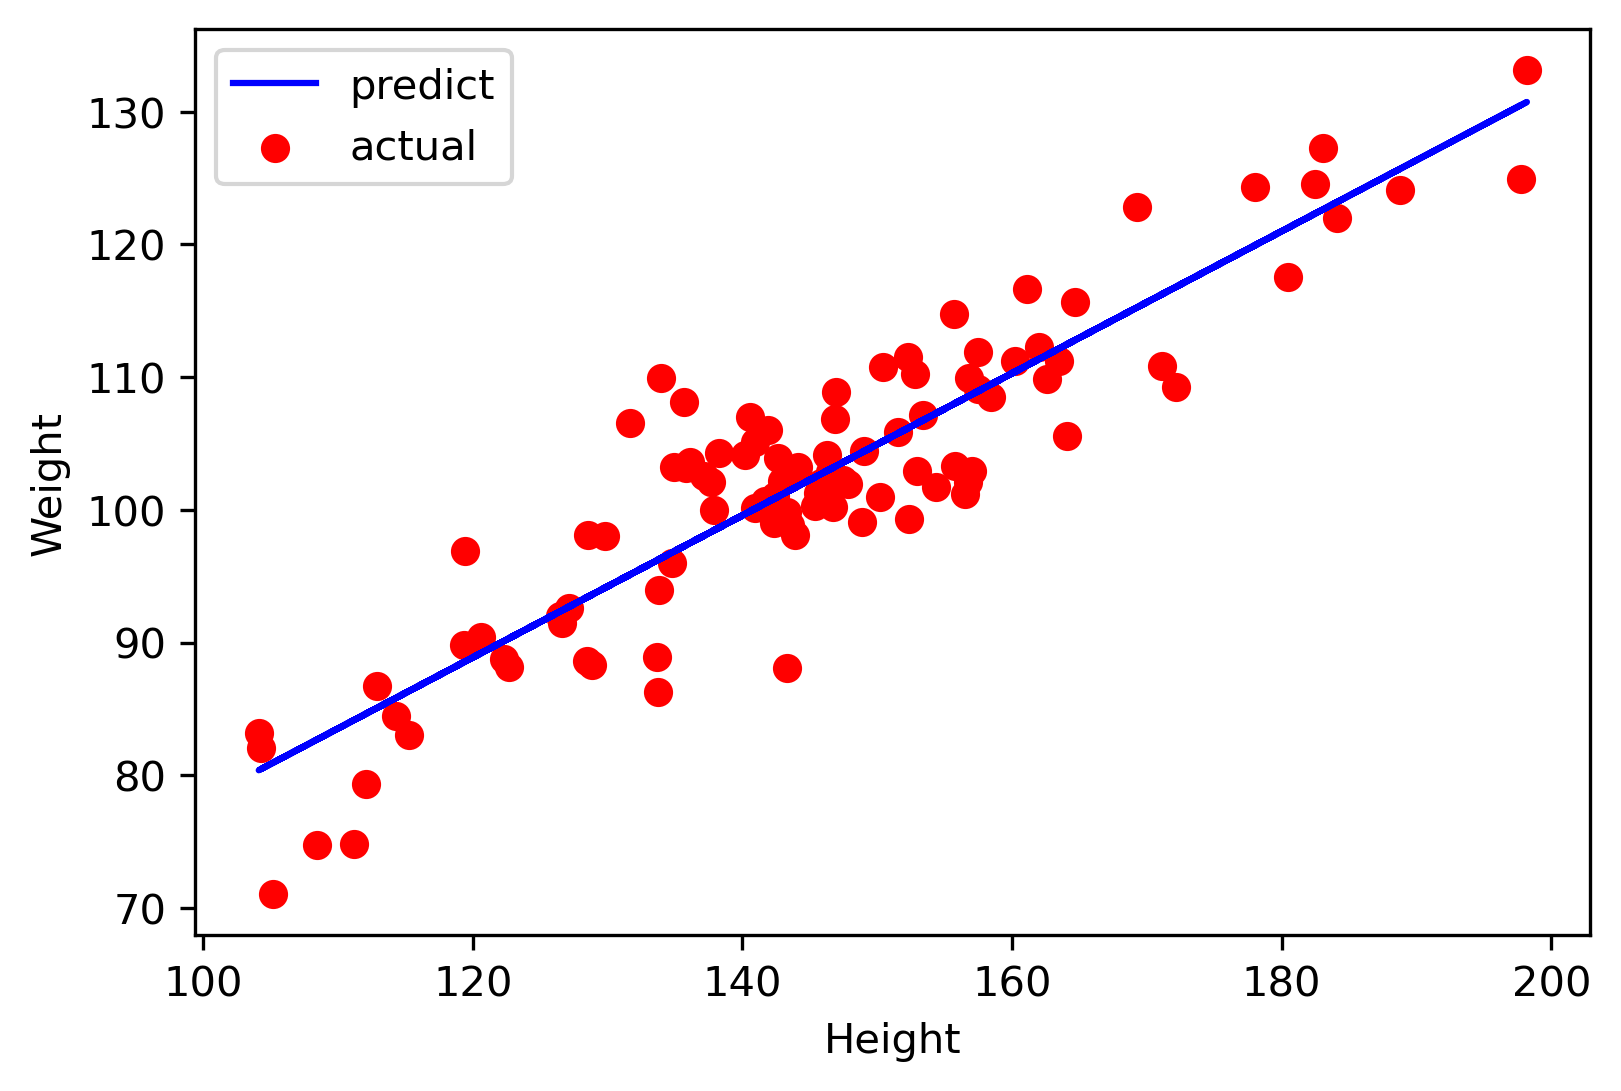

In [73]:
plt.figure(dpi=300)
plt.scatter(x, y, color='red', label='actual')
plt.plot(x, y_pred, color='blue', label='predict')
plt.xlabel('Height')
plt.ylabel("Weight")
plt.legend()
plt.plot()

In [74]:
new_heights = [ 100, 156, 178, 160, 133]

In [75]:
new_weights = [ beta_0+beta_1*h for h in new_heights]

In [76]:
new_weights

[78.17369950542903,
 108.15185037354291,
 119.92898107173052,
 110.29314686412248,
 95.83939555271043]